# 1. From text to a numerical representation
In the previous tutorial, we represented documents as sets of tokens (also known as the boolean representation).
Typically, machine learning algorithms require a vectorial representation for their data. 
The most common vectorial representation for textual data is the Vector Space Model, in which the score on each dimension (each feature) is constructed by using:

 1. Boolean Representation
 2. Term Frequency (TF)
 3. Term Frequency - Inverse document frequency (TF-IDF)

All of these are available in `sklearn.feature_extraction.text`, a module of the `scikit-learn` library. 
This tutorial will cover the construction of these representations, as well as training and using textual classifiers.

In [2]:
## some configurations for notebook and importing modules
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this tutorial we use the `newsgroup dataset`, in which documents belong to one of the nine categories.

We load dataset into a `pandas` Dataframe, which is a two-dimensional labeled data-structure (similar to a table), in which columns represent attributes and rows represent data instances.
The in the `dataset` Dataframe resulted after executing the next block, each row is a document, and the columns are the id, the category and the text of the given document.

In [3]:
from data import read_as_df
from prepros import preprocessor
## TODO start
## provide path to full newsgroup dataset
path_to_dataset = '../data/newsgroups/'
## TODO stop

dataset = read_as_df(path_to_dataset)
dataset.head()

,id,category,text
0,51832,comp.sys.mac.hardware,From: walsteyn@fys.ruu.nl (Fred Walsteijn)\nSu...
1,51658,comp.sys.mac.hardware,From: jas@ISI.EDU (Jeff Sullivan)\nSubject: AD...
2,52029,comp.sys.mac.hardware,From: ross@vorpal.ucsb.edu (Richard Ross)\nSub...
3,51667,comp.sys.mac.hardware,From: Ravi Konchigeri <mongoose@leland.stanfor...
4,52224,comp.sys.mac.hardware,From: Kevin Hester <kevinh@apple.com>\nSubject...


We use the preprocessing function that you wrote in the previous tutorial (now available in the file `prepros.py`) to pre-process each document in the dataset. 
This will add a new column to the previously created Dataframe.

**Note** This next block might take a while to execute.

In [4]:
dataset['tokens'] = dataset['text'].apply(preprocessor)
dataset.head()

,id,category,text,tokens
0,51832,comp.sys.mac.hardware,From: walsteyn@fys.ruu.nl (Fred Walsteijn)\nSu...,"[walsteyn, fys, ruu, nl, fred, walsteijn, subj..."
1,51658,comp.sys.mac.hardware,From: jas@ISI.EDU (Jeff Sullivan)\nSubject: AD...,"[jas, isi, edu, jeff, sullivan, subject, adb, ..."
2,52029,comp.sys.mac.hardware,From: ross@vorpal.ucsb.edu (Richard Ross)\nSub...,"[ross, vorpal, ucsb, edu, richard, ross, subje..."
3,51667,comp.sys.mac.hardware,From: Ravi Konchigeri <mongoose@leland.stanfor...,"[ravi, konchigeri, mongoos, leland, stanford, ..."
4,52224,comp.sys.mac.hardware,From: Kevin Hester <kevinh@apple.com>\nSubject...,"[kevin, hester, kevinh, appl, com, subject, ii..."


In the previous module, we studied the boolean representation of a document, as a set of tokens.
Here, we build a bag-of-words representation, where each document is represented as vector of word counts rather than just as a set of words. 

## 1.1 CountVectorizer

We use scikit-learn's [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for vectorizing the tokens. 
[Scikit Learn](http://scikit-learn.org/stable/index.html) is a popular python package for machine learning.

CountVectorizer itself can remove stop_words, convert text into lowercase tokens.
However, we will not use these options since we have already built a more sophisticated tokenizer, which can stem tokens (which not readily available in scikit-learn). 
To use our tokenizer, we define CountVectorizer with options `tokenizer = lambda x: x`, which means we are asking CountVectorizer to apply identity function as we already have a list of tokens available. 

Note that we can set `binary=True` option to use the boolean representation.
Setting it to False outputs a bag-of-words representation.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(lowercase = False, 
                                     tokenizer = lambda x: x, # because we already have tokens available
                                     stop_words = None, ## stop words removal already done from NLTK
                                     max_features = 5000, ## pick top 5K words by frequency
                                     ngram_range = (1, 1), ## we want unigrams now
                                     binary = False) ## we want as binary/boolean features
text_vec = bow_vectorizer.fit_transform(dataset.tokens)
print(text_vec[0, ]) ## see the features indices that are set to 1

  (0, 3249)	1
  (0, 1544)	1
  (0, 3638)	1
  (0, 272)	1
  (0, 2612)	1
  (0, 2155)	1
  (0, 2179)	1
  (0, 2125)	1
  (0, 4328)	1
  (0, 234)	1
  (0, 406)	1
  (0, 882)	1
  (0, 4435)	1
  (0, 3407)	1
  (0, 175)	1
  (0, 1661)	1
  (0, 3373)	1
  (0, 1327)	2
  (0, 3399)	2
  (0, 204)	1
  (0, 1026)	1
  (0, 423)	1
  (0, 3726)	1
  (0, 3654)	1
  (0, 1289)	2
  :	:
  (0, 2983)	1
  (0, 2152)	1
  (0, 3522)	1
  (0, 2644)	1
  (0, 2565)	1
  (0, 4352)	1
  (0, 3059)	1
  (0, 1628)	1
  (0, 3852)	1
  (0, 4882)	1
  (0, 2482)	3
  (0, 2908)	2
  (0, 4625)	2
  (0, 4570)	2
  (0, 1103)	1
  (0, 3256)	1
  (0, 3094)	1
  (0, 2060)	2
  (0, 2562)	2
  (0, 3394)	3
  (0, 4702)	1
  (0, 4172)	1
  (0, 1673)	3
  (0, 2945)	4
  (0, 3765)	4


The vectorial representation represents each document as a vector, in which each dimension corresponds to a word/token in the vocabulary build from the entire dataset/corpus. 
For example, one of the line in the output states:

`(0, 3211)	6`

, which means that the first document has 6 occurrences of the $3212^{th}$ feature (word).

Let's see which work corresponds to that index and which are the first 100 features:

In [6]:
print(bow_vectorizer.get_feature_names()[3211])
## list of feature names (they are just tokens here)
print(bow_vectorizer.get_feature_names()[:100])

penn
['aa', 'aaron', 'ab', 'abil', 'abl', 'abort', 'absolut', 'abstract', 'absurd', 'abus', 'ac', 'academ', 'acc', 'acceler', 'accept', 'access', 'accid', 'accommod', 'accompani', 'accomplish', 'accord', 'account', 'accumul', 'accur', 'accuraci', 'achiev', 'acid', 'acknowledg', 'acm', 'acn', 'acquir', 'acronym', 'across', 'acsu', 'act', 'action', 'activ', 'actual', 'ad', 'adam', 'adapt', 'adaptec', 'adaptor', 'adb', 'adcom', 'add', 'addit', 'address', 'adequ', 'adhes', 'adjust', 'admin', 'administr', 'admit', 'adob', 'adopt', 'adress', 'adrian', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'advisori', 'advoc', 'ae', 'aerospac', 'af', 'affect', 'afford', 'afraid', 'africa', 'ag', 'agat', 'age', 'agenc', 'agent', 'ago', 'agora', 'agre', 'agreement', 'ah', 'ahead', 'ahf', 'ai', 'aid', 'aim', 'air', 'aircraft', 'aix', 'aj', 'ajz', 'ak', 'aka', 'al', 'ala', 'alabama', 'alan', 'alaska']


## 1.2 The sparsity of the feature space
The feature space is sparse, and as a result CountVectorizer represents documents them using a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html), instead of a [dense matrix](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.html)
(if each document is a vector, a collection of documents corresponds to a matrix).

To verify this, we can check how many features are enabled in the matrix corresponding to our dataset:

In [7]:
print('{} values are set, out of a maximum of {} = {:.2f}%'.format(
    text_vec.nnz, dataset.shape[0] * 10000, 1.0 * text_vec.nnz / (dataset.shape[0] * 10000) * 100))

685776 values are set, out of a maximum of 88430000 = 0.78%


As we can see, less than 1% of the matrix elements are set, so representing the data with dense matrix would be an inefficient usage of memory. 
So, `scikit-learn`'s [Count vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) internally uses sparse representations.

# 2. Building a classifier

## 2.1 Naive Bayes Classifier

Having represented documents in the Vector Space Model, we setup to build a Naive Bayes textual classifier.
While in the lectures, Naive Bayes was presented before introducing the Vector Space Model, you might remember that we need to counts term occurrences when computing the $ \hat P(t | c)$ (see the [lecture slides](https://wattlecourses.anu.edu.au/pluginfile.php/1412123/mod_resource/content/7/ML1_TextClassification and Naive Bayes.pdf#page=27) ).
This amounts to constructing a TF vectorial representation.
Therefore, the [Naive bayes classifier](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) implementation available in `scikit-learn` requires the document collection to be in a vectorial representation prior to training Naive Bayes.

Next, we split the dataset into a training set (75% of the entire dataset) and a testing set (25%). 
We train a Naive Bayes Classifier on the training set and we get the predictions on test dataset.

**Note** that we are using `LabelEncoder` here to encode labels/classes of documents as numbers. 
The 9 classes will be mapped into numbers from 0 to 8 using this label encoder. 
We require this to render the dataset compatible with `scikit-learn` and the plotting libraries.

In [8]:
from sklearn.naive_bayes import MultinomialNB
msk = np.random.rand(len(dataset)) < 0.75
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_X = text_vec[msk]
test_X = text_vec[~msk]

y = le.fit_transform(dataset.category)
train_y = y[msk]
test_y = y[~msk]

In [11]:
train_X.shape
text_vec.shape

(8843, 5000)

We train the classifier using:

In [12]:
classifier =  MultinomialNB()
classifier.fit(train_X, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

To make predictions, we use the `predict` method.

In [13]:
preds_bow = classifier.predict(test_X)
to_print = [le.inverse_transform(pred) for pred in preds_bow ]
print(to_print[:100])

['comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.sys.mac.h

## 2.2 Evaluating the prediction performance
To evaluate how well the classifier performed, we compute the confusion matrix, as well as the overall accuracy, and the per-class precision, recall and F1 measure:

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
confusion = confusion_matrix(test_y, preds_bow)
acc_bow = accuracy_score(test_y, preds_bow)
precisions_bow, recalls_bow, f1_scores_bow, _ = precision_recall_fscore_support(test_y, preds_bow)

print("accuracy = {}".format(acc_bow))

print("{:>25} {:>4} {:>4} {:>4}".format("", "prec", "rec", "F1"))
for (idx, scores) in enumerate(zip(precisions_bow, recalls_bow, f1_scores_bow)):
    print("{:>25} {:.2f} {:.2f} {:.2f}".format(
        le.inverse_transform(idx), scores[0], scores[1], scores[2]
    ))

print('confusion matrix:\n{}'.format( confusion) )

accuracy = 0.7836363636363637
                          prec  rec   F1
            comp.graphics 0.65 0.81 0.72
  comp.os.ms-windows.misc 0.67 0.02 0.03
 comp.sys.ibm.pc.hardware 0.57 0.86 0.69
    comp.sys.mac.hardware 0.70 0.92 0.79
           comp.windows.x 0.80 0.81 0.81
                sci.crypt 0.96 0.98 0.97
          sci.electronics 0.85 0.81 0.83
                  sci.med 0.96 0.92 0.94
                sci.space 0.94 0.93 0.94
confusion matrix:
[[206   0  12  11  15   3   3   2   3]
 [ 54   4 108  36  31   2   7   0   1]
 [  3   0 212  21   1   0   8   0   1]
 [  4   0  10 209   0   0   5   0   0]
 [ 29   0   6   4 196   0   1   2   3]
 [  1   1   1   0   1 240   1   1   0]
 [  8   0  19  11   1   4 201   2   1]
 [  4   0   0   6   0   0   7 234   4]
 [ 10   1   1   0   0   0   3   2 222]]


## 2.3 Improving the performance with different feature representations

We attempt to improve the classifier's performance using other features.
We start with the boolean features: whenever a feature (token) appears in a document we mark a value of 1 instead of number of occurrence of that token.

We can pipeline vectorization, and classifier in scikit learn. Refer [this documentation](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.

In [15]:
le = LabelEncoder()

train_X = dataset.tokens[msk]
test_X = dataset.tokens[~msk]
y = le.fit_transform(dataset.category)
train_y = y[msk]
test_y = y[~msk]

Again we will use CountVectorizer, but the difference here is `binary = True` argument, which tells CountVectorizer to use binary features instead of term frequencies.

In [16]:
bin_vectorizer = CountVectorizer(lowercase = False, 
                                     tokenizer = lambda x: x, # because we already have tokens available
                                     stop_words = None, ## stop words removal already done from NLTK
                                     max_features = 5000, ## pick top 5K words by frequency
                                     ngram_range = (1, 1), ## we want unigrams now
                                     binary = True) ## Now it is Binary

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow',  bin_vectorizer),
    ('naive-bayes',  MultinomialNB()) ])

## Fit the data
pipeline.fit(train_X, train_y)

## see accuracy and confusion matrix
preds_bin = pipeline.predict(test_X)

confusion = confusion_matrix(test_y, preds_bin)
acc_bool = accuracy_score(test_y, preds_bin)
precisions_bool, recalls_bool, f1_scores_bool, _ = precision_recall_fscore_support(test_y, preds_bin)

print("accuracy = {}".format(acc_bool))

print("{:>25} {:>4} {:>4} {:>4}".format("", "prec", "rec", "F1"))
for (idx, scores) in enumerate(zip(precisions_bool, recalls_bool, f1_scores_bool)):
    print("{:>25} {:.2f} {:.2f} {:.2f}".format(
        le.inverse_transform(idx), scores[0], scores[1], scores[2]
    ))

print('confusion matrix:\n{}'.format( confusion) )

accuracy = 0.8536363636363636
                          prec  rec   F1
            comp.graphics 0.72 0.78 0.75
  comp.os.ms-windows.misc 0.82 0.73 0.77
 comp.sys.ibm.pc.hardware 0.72 0.80 0.76
    comp.sys.mac.hardware 0.81 0.87 0.84
           comp.windows.x 0.85 0.90 0.87
                sci.crypt 0.97 0.96 0.97
          sci.electronics 0.90 0.78 0.84
                  sci.med 0.97 0.93 0.95
                sci.space 0.97 0.92 0.94
confusion matrix:
[[200   9  14   5  18   5   1   2   1]
 [ 22 178  22   7  10   1   3   0   0]
 [  4  15 197  21   3   0   6   0   0]
 [  6   4  15 198   1   0   3   0   1]
 [ 13   5   3   1 216   0   1   1   1]
 [  0   2   0   0   3 237   1   2   1]
 [ 12   4  18  13   2   2 193   1   2]
 [  8   0   2   0   0   0   5 238   2]
 [ 12   1   1   0   1   0   1   2 221]]


It appears that the Boolean features improved prediction performances.
Let's see how the TF-IDF features perform.

## 2.4 Improving the performance with  TFIDF 
TF-IDF reflects how important a token/term is to a document, with respect to the entire collection of documents. 
To build a pipeline with TF-IDF representation, we add a [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) after the bag-of-words vectorizer. 
It means that we are transforming the token counts using TF-IDF.

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow',  bow_vectorizer),
    ('tfidf',  TfidfTransformer()),
    ('naive-bayes',  MultinomialNB()) ])

## Fit the data
pipeline.fit(train_X, train_y)

## see accuracy and confusion matrix
preds_tfidf = pipeline.predict(test_X)

confusion = confusion_matrix(test_y, preds_tfidf)
acc_tfidf = accuracy_score(test_y, preds_tfidf)
precisions_tfidf, recalls_tfidf, f1_scores_tfidf, _ = precision_recall_fscore_support(test_y, preds_tfidf)

print("accuracy = {}".format(acc_tfidf))

print("{:>25} {:>4} {:>4} {:>4}".format("", "prec", "rec", "F1"))
for (idx, scores) in enumerate(zip(precisions_tfidf, recalls_tfidf, f1_scores_tfidf)):
    print("{:>25} {:.2f} {:.2f} {:.2f}".format(
        le.inverse_transform(idx), scores[0], scores[1], scores[2]
    ))

print('confusion matrix:\n{}'.format( confusion) )

accuracy = 0.8672727272727273
                          prec  rec   F1
            comp.graphics 0.76 0.79 0.77
  comp.os.ms-windows.misc 0.80 0.83 0.81
 comp.sys.ibm.pc.hardware 0.77 0.84 0.80
    comp.sys.mac.hardware 0.86 0.86 0.86
           comp.windows.x 0.85 0.87 0.86
                sci.crypt 0.95 0.98 0.97
          sci.electronics 0.92 0.79 0.85
                  sci.med 0.97 0.92 0.94
                sci.space 0.96 0.93 0.94
confusion matrix:
[[201   6   8   7  23   6   1   1   2]
 [ 16 202  17   1   7   0   0   0   0]
 [  1  18 207  12   2   0   6   0   0]
 [  6   7  13 197   0   0   4   1   0]
 [ 17   7   3   1 209   0   1   1   2]
 [  0   4   0   0   0 241   0   1   0]
 [  6   5  20   8   3   5 195   2   3]
 [  5   3   1   2   0   1   6 234   3]
 [ 13   1   1   0   1   0   0   1 222]]


TF-IDF further improves the prediction performance, compared to the binary features. 
Compared to the TF representation, the TFIDF transformer leads to a significant improvement of accuracy (more than 5%). Why did this happened?

Can you identify why we were getting low accuracy in the bag of words model? And how did this change in the TF-IDF representation?

Let's compare the accuracy of these three classifiers.

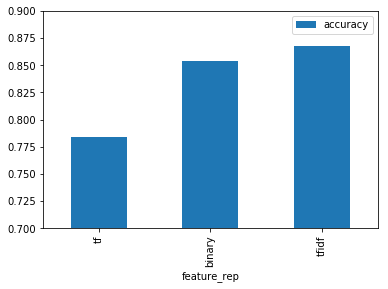

In [18]:
accuracies = pd.DataFrame(
    [('tf', acc_bow), ('binary', acc_bool), ('tfidf', acc_tfidf)], 
    columns = ['feature_rep', 'accuracy']
).set_index('feature_rep')
accuracies.plot.bar(ylim = (0.7, 0.9))

## 2.5 Further improving performance with Bigrams features
Until now, we created feature representations using unigrams, i.e. taking one token as a feature. 
The main disadvantage of doing this is that we loss positional information in unigram feature representation. 
To address this, we can use n-gram as a features: we use sequences of n words to construct features.

Let's train the best performing model, i.e. TFIDF-based classifier with both unigrams and bigrams features, and see how it performs.

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

bigrams_bow_vectorizer = CountVectorizer(lowercase = False, 
                                     tokenizer = lambda x: x, # because we already have tokens available
                                     stop_words = None, ## stop words removal already done from NLTK
                                     max_features = 20000, ## pick top 20K tokens by frequency. We need more now.
                                     ngram_range = (1, 2), ## we want unigrams bigrams now
                                     binary = False) ## Now it's Bag of Words


pipeline = Pipeline([
    ('bigram_bow',  bigrams_bow_vectorizer),
    ('tfidf',  TfidfTransformer()),
    ('naive-bayes',  MultinomialNB()) ])

## Fit the data
pipeline.fit(train_X, train_y)

## see accuracy and confusion matrix
preds_tfidf_bigrams = pipeline.predict(test_X)

confusion = confusion_matrix(test_y, preds_tfidf_bigrams)
acc_tfidf_bigrams = accuracy_score(test_y, preds_tfidf_bigrams)
precisions_tfidf_bigrams, recalls_tfidf_bigrams, f1_scores_tfidf_bigrams, _ = precision_recall_fscore_support(
    test_y, preds_tfidf_bigrams
)

print("accuracy = {}".format(acc_tfidf_bigrams))

print("{:>25} {:>4} {:>4} {:>4}".format("", "prec", "rec", "F1"))
for (idx, scores) in enumerate(zip(precisions_tfidf_bigrams, recalls_tfidf_bigrams, f1_scores_tfidf_bigrams)):
    print("{:>25} {:.2f} {:.2f} {:.2f}".format(
        le.inverse_transform(idx), scores[0], scores[1], scores[2]
    ))

print('confusion matrix:\n{}'.format( confusion) )

accuracy = 0.8763636363636363
                          prec  rec   F1
            comp.graphics 0.81 0.76 0.79
  comp.os.ms-windows.misc 0.85 0.83 0.84
 comp.sys.ibm.pc.hardware 0.77 0.83 0.80
    comp.sys.mac.hardware 0.84 0.89 0.86
           comp.windows.x 0.87 0.89 0.88
                sci.crypt 0.96 0.98 0.97
          sci.electronics 0.91 0.81 0.86
                  sci.med 0.96 0.94 0.95
                sci.space 0.93 0.95 0.94
confusion matrix:
[[195   5  10   9  22   4   4   1   5]
 [ 14 202  17   3   5   0   2   0   0]
 [  2  13 205  15   2   0   6   2   1]
 [  1   5  13 202   0   0   3   2   2]
 [ 12   2   4   2 214   2   0   2   3]
 [  0   2   1   0   0 242   0   1   0]
 [  6   4  13   9   2   4 201   3   5]
 [  2   4   1   1   1   1   5 239   1]
 [  8   0   1   0   1   0   1   0 228]]


We can notice a slight improvement in accuracy, of about 1%.

We can notice a variation in classifier performance due to the feature representation we use. Why do you think this has happened? 

Now, let's create a plot to compare the accuracies as before.

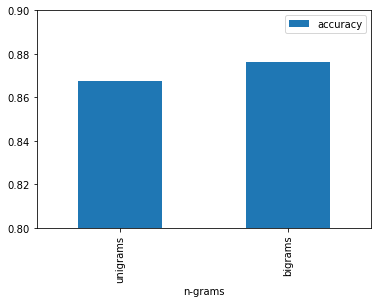

In [20]:
accuracies = pd.DataFrame(
    [('unigrams', acc_tfidf),  ('bigrams', acc_tfidf_bigrams)], 
    columns = ['n-grams', 'accuracy']
).set_index('n-grams')
accuracies.plot.bar(ylim = (0.8, 0.9))

Let's see what bigrams features look like.

In [21]:
print(bigrams_bow_vectorizer.get_feature_names()[:100])

['aa', 'aarhus', 'aaron', 'aaron lung', 'aau', 'aau dk', 'ab', 'ab ca', 'ab line', 'ab nova', 'abandon', 'abbrevi', 'abc', 'abdkw', 'abdkw stdvax', 'abdomen', 'abdomin', 'abil', 'abl', 'abl find', 'abl get', 'abl handl', 'abl help', 'abl make', 'abl read', 'abl run', 'abl see', 'abl support', 'abl use', 'abnorm', 'abo', 'abo fi', 'aboard', 'abomin', 'abort', 'abpsoft', 'abpsoft mehl', 'abridg', 'abroad', 'absenc', 'absolut', 'absolut noth', 'absorb', 'abstract', 'absurd', 'absurd bertrand', 'absurd whoever', 'abus', 'abyss', 'ac', 'ac brocku', 'ac bu', 'ac dal', 'ac edu', 'ac f', 'ac il', 'ac jp', 'ac kr', 'ac muohio', 'ac nz', 'ac oakland', 'ac ox', 'ac uk', 'ac za', 'acad', 'academ', 'academ comput', 'academ freedom', 'academi', 'acc', 'acc georgetown', 'acc virginia', 'acceler', 'acceler card', 'acceler laboratori', 'acceler video', 'accept', 'accept wiretap', 'access', 'access bus', 'access content', 'access control', 'access data', 'access digex', 'access drive', 'access encrypt',

We can notice sequences of two tokens used as features.

# Distance metrics and searching in the Vector Space Model

## 3.1 Distance metrics for a document

In the previous tutorial, we used boolean logic on the set representation of features to perform exact document match. With vector representations introduced in this module, we can query for partial matches. 

The degree of matching can be quantified by similarity metrics. 
The similarity metrics can be computed from distance metrics, where the distance between documents are computed in vector spaces. There are two popular choices for distance metrics in this space:
1. Cosine distance
2. Euclidean distance

To search for similar documents, we use the candidates that has minimum distance with the query's vector representation. We use the TFIDF vectorizer with unigrams representation for this.

In [22]:
vectorizer = Pipeline([
    ('bow',  bow_vectorizer),
    ('tfidf',  TfidfTransformer())])
vectorizer.fit(dataset.tokens)
tfidf_vec = vectorizer.transform(dataset.tokens)

Let's use this vectorizer to create a vector representation of our previous two queries: `research seminar` and `scientific visualization`

In [23]:
tokens1 = preprocessor("research seminar")
query_vec1 = vectorizer.transform([tokens1])

tokens2 = preprocessor("scientific visualization")
query_vec2 = vectorizer.transform([tokens2])

The implementation of the distance metrics are provided in the file `dist.py`. 
Have a look at the functions provided there.

We can use the provided `dist` function as:

In [24]:
from dist import dist, search
cosine_distance = dist(query_vec1.toarray().squeeze(), query_vec2.toarray().squeeze(), method = 'cosine')
euclid_distance = dist(query_vec1.toarray().squeeze(), query_vec2.toarray().squeeze(), method = 'euclid')

print('cosine distance = {}, euclid distance = {}'.format(cosine_distance, euclid_distance))

cosine distance = 1.0, euclid distance = 1.4142135623730951


## 3.2 Search and ranking

We use the same distance measures to search for similar documents for a query text. 
The most similar documents in our collections are the ones that have lowest distance against the query string. 
We can also use the distance to rank the search results.

Have a look at search function in `dist.py`. 

Top 5 matches with `research seminar`:

In [25]:
## get indexes of the most similar documents 
idxs1 = search(tfidf_vec.toarray().squeeze(),
        query_vec1.toarray().squeeze(),
        dist_measure = 'cosine'
)

## ranked top 5 search results for query 'research seminar'
dataset.iloc[idxs1]

,id,category,text,tokens
4977,38609,comp.graphics,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,"[lipman, oasi, dt, navi, mil, robert, lipman, ..."
1534,8514,comp.os.ms-windows.misc,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,"[lipman, oasi, dt, navi, mil, robert, lipman, ..."
5826,37261,comp.graphics,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,"[lipman, oasi, dt, navi, mil, robert, lipman, ..."
5055,38582,comp.graphics,From: chris@sarah.lerc.nasa.gov (Chris Johnsto...,"[chris, sarah, lerc, nasa, gov, chris, johnsto..."
5516,38782,comp.graphics,From: dsg@ecrc.de (Douglas S. Greer)\nSubject:...,"[dsg, ecrc, de, dougla, greer, subject, resear..."


Top 5 matches with `scientific visualization` based on euclidean distance measure:

In [26]:
idxs2 = search(tfidf_vec.toarray().squeeze(),
        query_vec2.toarray().squeeze(),
        dist_measure = 'euclid'
)

## ranked top 5 search results for query 'research seminar'
dataset.iloc[idxs2]

,id,category,text,tokens
4691,68272,comp.windows.x,From: dbl@visual.COM\nSubject: Re: 'makedepend...,"[dbl, visual, com, subject, makedepend, proble..."
4151,67279,comp.windows.x,"Organization: Ministry of Education, Computer ...","[organ, ministri, educ, comput, center, netnew..."
4882,67383,comp.windows.x,From: herlock@lclark.edu (Jon Herlocker)\nSubj...,"[herlock, lclark, edu, jon, herlock, subject, ..."
4888,66893,comp.windows.x,From: stolk@fwi.uva.nl (Bram)\nSubject: Creati...,"[stolk, fwi, uva, nl, bram, subject, creat, bi..."
4555,66996,comp.windows.x,From: gerard@dps.co.UK (Gerard O'Driscoll)\nSu...,"[gerard, dps, co, uk, gerard, driscol, subject..."


# 4 [Advanced] AUC and ROC 

Another popular evaluation metric for evaluating per class performance of a classifier is the [Area under Curve (AUC) of the Receiver Operating Characteristics (ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). 

The ROC curve plots the true positive rate (Sensitivity) against the false positive rate (Specificity) for different cut-off points. 
Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. 

AUC is the area under ROC curve. $ AUC \in [0.5, 1]$ and a value of $0.5$ corresponds to a random classifiers. Higher is better.

The block below demonstrates how we can use matplotlib (python plotting library) and scikit's evaluation metric functions to plot per class performance of our classifier. 
We will see the plot for our best performing classifier (i.e. TFIDF with bigrams feature representation).

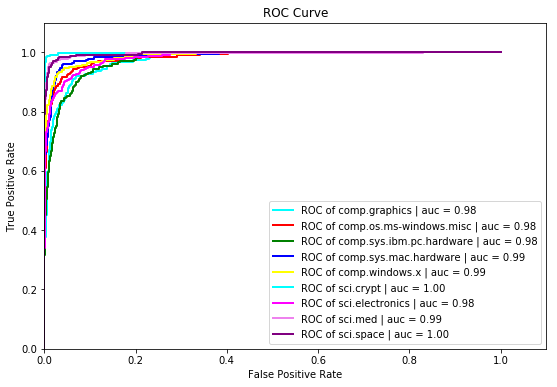

In [27]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc

pipeline = Pipeline([
    ('bigram_bow',  bigrams_bow_vectorizer),
    ('tfidf',  TfidfTransformer()),
    ('naive-bayes',  MultinomialNB()) ])

## Fit the data
pipeline.fit(train_X, train_y)

## This function plots the ROC curve
def plot_roc(labels, probs, le):
    colors = cycle(['aqua', 'red', 'green', 'blue', 'yellow', 'cyan', 'magenta', 'violet', 'purple', 'black', 'grey'])
    fpr, tpr = dict(), dict()
    roc_auc = dict()
    for label in range(len(list(le.classes_))):
        color = next(colors)
        fpr[label], tpr[label], _ = roc_curve(test_y == label, probs[:, label])
        roc_auc[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label], tpr[label], color = color, lw=2,
                 label ='ROC of {0} | auc = {1:0.2f}'
                 ''.format(le.inverse_transform(label), roc_auc[label]))
    plt.xlim([0.0, 1.1])
    plt.ylim([0.0, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

plt.figure(figsize=(9, 6))  # the plot size you want

## see accuracy and confusion matrix
preds_tfidf_bigrams = pipeline.predict_proba(test_X)
plot_roc(test_y, preds_tfidf_bigrams, le)